<a href="https://colab.research.google.com/github/saghar-trade/Unsupervised-Learning/blob/main/PCA_tsne_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [5]:
#download mnist dataset

mnist = datasets.fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [10]:
def run_pca_example(save_path="pca_example.png", sample_size=2000):

  mnist = datasets.fetch_openml('mnist_784', version=1,as_frame=False)
  X = mnist.data.astype("float32") / 255.0
  y = mnist.target.astype(int)



  rng = np.random.RandomState(42)
  idx = rng.choice(np.arange(X.shape[0]), size=sample_size, replace=False)
  X = X[idx]
  y = y[idx]


  pca = PCA(n_components=2, random_state=42)
  X_pca = pca.fit_transform(X)


  plt.figure(figsize=(7,6))
  scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='tab10', s=10, alpha=0.8)
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.title(f'PCA — MNIST (n={X.shape[0]})')
  plt.colorbar(scatter, ticks=np.unique(y))
  plt.tight_layout()
  plt.savefig(save_path)
  print(f"PCA example saved to: {save_path}")


In [11]:
def run_tsne_example(save_path="tsne_example.png", sample_size=2000):

  mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False)
  X = mnist.data.astype("float32") / 255.0
  y = mnist.target.astype(int)



  rng = np.random.RandomState(42)
  idx = rng.choice(np.arange(X.shape[0]), size=sample_size, replace=False)
  X = X[idx]
  y = y[idx]


  tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
  X_tsne = tsne.fit_transform(X)


  plt.figure(figsize=(7,6))
  scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='tab10', s=10, alpha=0.9)
  plt.xlabel('t-SNE dim 1')
  plt.ylabel('t-SNE dim 2')
  plt.title(f't-SNE — MNIST (n={X.shape[0]})')
  plt.colorbar(scatter, ticks=np.unique(y))
  plt.tight_layout()
  plt.savefig(save_path)
  print(f"t-SNE example saved to: {save_path}")


PCA example saved to: pca_example.png


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE example saved to: tsne_example.png


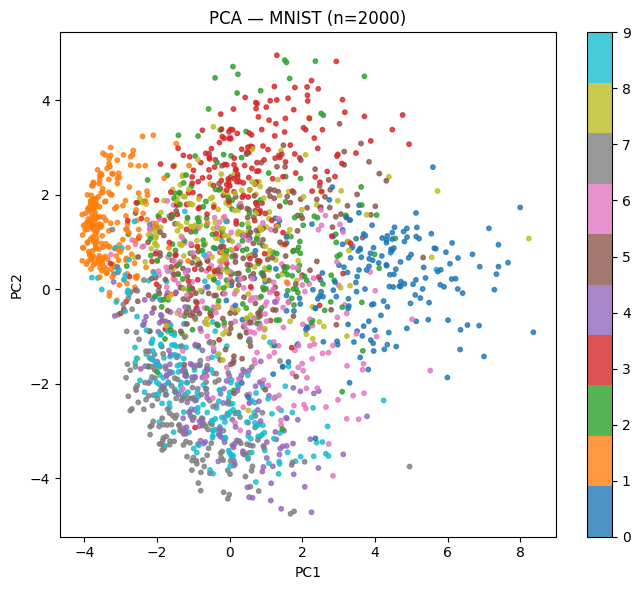

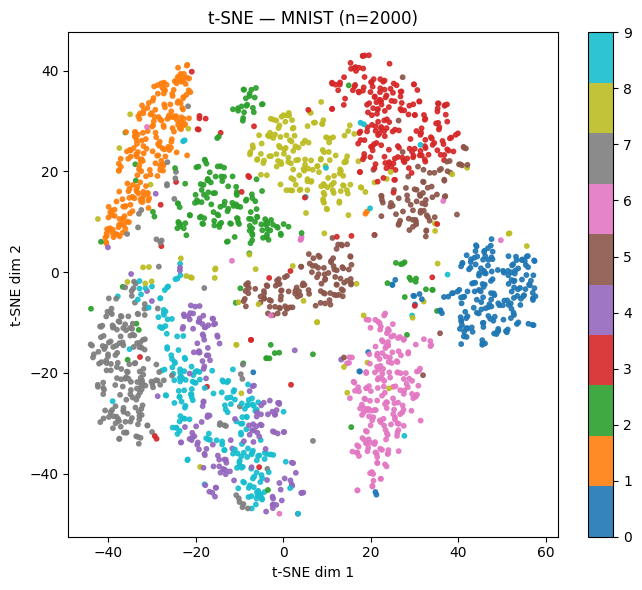

In [12]:
if __name__ == '__main__':
  run_pca_example()
  run_tsne_example()


